# Task and dataset detailed information

# https://archive.ics.uci.edu/dataset/73/mushroom

In [1]:
# The goal is to predict whether a mushroom is poisonous or edible.

# Importing dataset 

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# Data exploration

In [5]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [6]:
X.tail()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l
8123,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,o,c,l


In [7]:
X.shape

(8124, 22)

In [8]:
X.dtypes

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [9]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
X.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [11]:
X.isnull().mean() * 100

cap-shape                    0.000000
cap-surface                  0.000000
cap-color                    0.000000
bruises                      0.000000
odor                         0.000000
gill-attachment              0.000000
gill-spacing                 0.000000
gill-size                    0.000000
gill-color                   0.000000
stalk-shape                  0.000000
stalk-root                  30.526834
stalk-surface-above-ring     0.000000
stalk-surface-below-ring     0.000000
stalk-color-above-ring       0.000000
stalk-color-below-ring       0.000000
veil-type                    0.000000
veil-color                   0.000000
ring-number                  0.000000
ring-type                    0.000000
spore-print-color            0.000000
population                   0.000000
habitat                      0.000000
dtype: float64

In [12]:
X.duplicated().sum()

0

<AxesSubplot:>

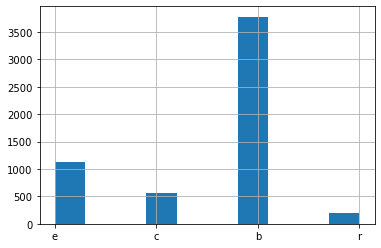

In [13]:
X['stalk-root'].hist()

# Handeling missing data

In [14]:
X = X.copy()
mode_value = X['stalk-root'].mode()[0]

# Fill the missing values with the mode value
X['stalk-root'].fillna(mode_value, inplace=True)


<AxesSubplot:>

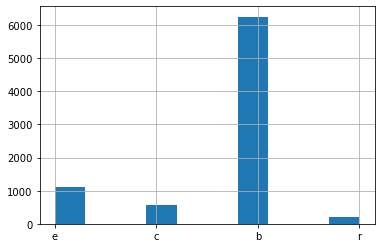

In [15]:
X['stalk-root'].hist()

# Feature engineering

# Encoding

In [16]:
encoder = OneHotEncoder(sparse_output=False)

for col in X.select_dtypes(include=['object']).columns:
    encoded_values = encoder.fit_transform(X[[col]])
    X[col] = encoded_values

In [17]:
X.dtypes

cap-shape                   float64
cap-surface                 float64
cap-color                   float64
bruises                     float64
odor                        float64
gill-attachment             float64
gill-spacing                float64
gill-size                   float64
gill-color                  float64
stalk-shape                 float64
stalk-root                  float64
stalk-surface-above-ring    float64
stalk-surface-below-ring    float64
stalk-color-above-ring      float64
stalk-color-below-ring      float64
veil-type                   float64
veil-color                  float64
ring-number                 float64
ring-type                   float64
spore-print-color           float64
population                  float64
habitat                     float64
dtype: object

In [18]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


# Handeling Duplicates after encoding

In [19]:
X.duplicated().sum()

8027

In [20]:
# Deleting duplicated rows after encoding
X = X.drop_duplicates().reset_index(drop=True)

# Ensure y is aligned with the updated X
y = y.iloc[X.index]

In [21]:
print(X.shape)
print(y.shape)

(97, 22)
(97, 1)


# Feature scaling

In [22]:
# rescale the data so that each feature has:Mean = 0 and Standard deviation = 1
scaler = StandardScaler()

for col in X.select_dtypes(include=['object']).columns:
    standrized_values = scaler.fit_transform(X[[col]])
    X[col] = standrized_values

# Feature selection

In [23]:
k = 5
selector = SelectKBest(score_func=chi2, k=k)
X = selector.fit_transform(X, y)

In [24]:
print(X.shape)
print(y.shape)


(97, 5)
(97, 1)


# Decision Tree classification model

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree classifier
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Calculate and display the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=mushroom.data.target_names))

Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           e       0.86      0.96      0.91        26
           p       0.00      0.00      0.00         4

    accuracy                           0.83        30
   macro avg       0.43      0.48      0.45        30
weighted avg       0.75      0.83      0.79        30



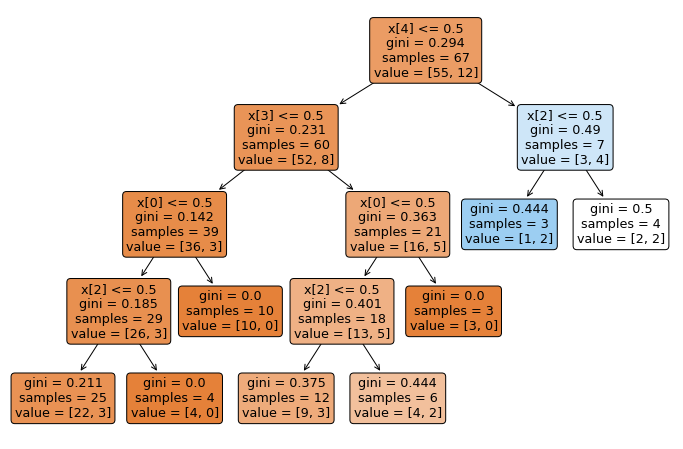

In [26]:
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=mushroom.data.feature_names, class_names=mushroom.data.target_names, rounded=True)
plt.show()

# Testing the model on new data

In [37]:
# new_data = newdata[[...]]
# new_prediction = tree.predict(new_data)
# print(f"Predicted class for the new data point: {new_prediction[0]}")

Predicted class for the new data point: e
